# Decision-Trees

- [Import IKEA Furniture Data-Set](#Import-IKEA-Furniture-Data-Set)
- [Create the Decision Tree](#Create-the-Decision-Tree)
    - [First Version of the Decision Tree](#First-Version-of-the-Decision-Tree)
        - [Visualization](#Visualization)
        - [Investigate the Importance of the Individual Features as Predictors](#Investigate-the-Importance-of-the-Individual-Features-as-Predictors)
        - [Compute the Training and Test Accuracy](#Compute-the-Training-and-Test-Accuracy)
    - [First Improvements of the Decision Tree](#First-Improvements-of-the-Decision-Tree)
        - [Visualization](#Visualization)
        - [Investigate the Importance of the Individual Features as Predictors](#Investigate-the-Importance-of-the-Individual-Features-as-Predictors)
        - [Compute the Training and Test Accuracy](#Compute-the-Training-and-Test-Accuracy)
    - [Final Version of the Decision Tree](#Final-Version-of-the-Decision-Tree)
        - [Visualization](#Visualization)
        - [Investigate the Importance of the Individual Features as Predictors](#Investigate-the-Importance-of-the-Individual-Features-as-Predictors)
        - [Compute the Training and Test Accuracy](#Compute-the-Training-and-Test-Accuracy)
- [Conclusion](#Conclusion)
- [Notes about Pruning](#Notes-about-Pruning)

In [1]:
# Import packages
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import graphviz

from matplotlib import pyplot as plt
from IPython.display import Image, display
%matplotlib inline
plt.style.use('ggplot')

## Import IKEA Furniture Data-Set

In [2]:
# load IKEA_df
with open('Data/IKEA_df.p', 'rb') as df:
    IKEA_df = pickle.load(df)

IKEA_df.head(4)

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,...,designer_len,size,unit,size_nounit,depth_median,depth_mean,height_mean,height_median,width_median,width_mean
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,False,"Bar table, in/outdoor",Nicholai Wiig Hansen,...,20,51x51 cm,cm,51x51,47.0,45.725926,97.571429,102.0,48.0,52.07027
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,False,Bar table,Francis Cayouette,...,17,140x80 cm,cm,140x80,47.0,45.725926,97.571429,102.0,48.0,52.07027
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,False,Bar table and 4 bar stools,Francis Cayouette,...,17,NaN,NaN,NaN,47.0,45.725926,97.571429,102.0,48.0,52.07027
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,True,Bar stool with backrest,Henrik Preutz,...,13,74 cm,cm,74,47.0,45.725926,97.571429,102.0,48.0,52.07027


In [3]:
# load learn_df
with open('Data/learn_df.p', 'rb') as df:
    learn_df = pickle.load(df)

In [4]:
# get labels
label = IKEA_df['category'].unique()
label = label.tolist()
print('labels:', label)

labels: ['Bar furniture', 'Beds', 'Bookcases & shelving units', 'Cabinets & cupboards', 'Café furniture', 'Chairs', 'Chests of drawers & drawer units', "Children's furniture", 'Nursery furniture', 'Outdoor furniture', 'Room dividers', 'Sideboards, buffets & console tables', 'Sofas & armchairs', 'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes']


In [5]:
# get number of features that can be used as predictors
t = learn_df.drop(columns = ['category','category_num']).shape[1]
print('Overall, there are '+str(t)+' features.')

Overall, there are 9 features.


## Create the Decision Tree
We are exploring the method of Classification Trees in order to classify the IKEA Furniture Data-Set. One advantage of Trees is, that they can easily handle qualitative variables without the use of dummy variables. Therefor, this method seems to be particularly fitting for the classification problem at hand.

In [6]:
# import tree, confusion_matrix, accuracy_score and train_test_split from sklearn library
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### First Version of the Decision Tree

In [7]:
clf = tree.DecisionTreeClassifier(min_samples_split=20)

# get the predictors
# fit a decision tree to predict 'category' from the data. For that, remove 'category' from the predictors
predictors = learn_df.columns.tolist()
predictors.remove('category')
predictors.remove('category_num')

X = learn_df[predictors].values
# get the response
y = learn_df.category.values.reshape(-1,1)

# make a split using 67% of the data for training and the remainder for testing
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# split data in test and training data-set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Train the model
tree_est = clf.fit(X_train, y_train)

# make predictions 
y_pred = tree_est.predict(X_test)

#### Visualization

In [8]:
# use sklearn's export to generate the dot-data string file with all the nodes and their props.
dot_data = tree.export_graphviz(tree_est, out_file='Figures/Decision_Trees/seat_tree_1.dot',feature_names=predictors, 
                filled=True, rounded=True, special_characters=True)



with open('Figures/Decision_Trees/seat_tree_1.dot') as f:
    dot_graph = f.read()  

# create the source object
I = graphviz.Source(dot_graph, format='png', engine='dot')
# Use ipython Image to shrink the rendered image of the source obj to fit into jupyter nb.
Image(I.render())
# also show the view of the source object in browser so we can zoom in on nodes and see what we've got
I.view()

'Source.gv.png'

So we see that the initial splitting occurs with Depth and Height predictors. 

#### Investigate the Importance of the Individual Features as Predictors
This is done by comparing the average Gini Index of the different features. The Gini Index of the different features can be retrieved from sklearn:

In [9]:
feature_importances = tree_est.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], 
                                                                                                ascending=False)

,Importance
depth,0.399332
height,0.282011
name,0.221227
price,0.050981
width,0.022777
item_id,0.010572
designer,0.009888
other_colors,0.003212
sellable_online,0.000000


#### Compute the Training and Test Accuracy

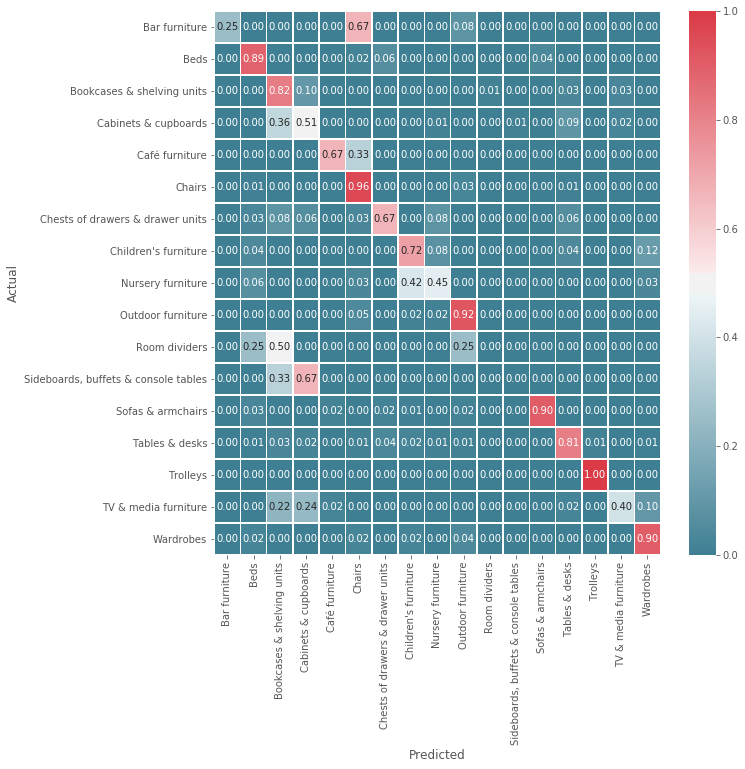

In [10]:
# Lets also get the training error rate of the tree model
cm = confusion_matrix(y_true = y_test, y_pred=y_pred, labels=label) 
#print(cm)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((len(label),len(label)))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(len(label)):
    cm1[k,:] = cm[k,:]/cm_sum[k]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = label, columns=label)

#plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('Figures/Decision_Trees/DT_CM_1.png', bbox_inches = 'tight')

In [11]:
# determine training accuracy 
y_pred_train = tree_est.predict(X_train)
accuracy_train_1 = accuracy_score(y_train, y_pred_train)
print("Model training accuracy:", accuracy_train_1)

Model training accuracy: 0.859927797833935


In [12]:
# determine test accuracy
accuracy_test_1 = accuracy_score(y_test, y_pred)
print("Model test accuracy:", accuracy_test_1)

Model test accuracy: 0.7770562770562771


As assumed when analyzing the given dataset, sellable_online does not have any importance as almost all products are sellable-online. Furthmeore, the Gini Index tells us, that other_colors and item_id have a small significance as well. 
other_colors ...
item_id is almost always individual and only in very view cases, an item_id is listed twice. Thus, this predictor does not have a large importance. 
In a nex step all features with an importance smaller than 2% are excluded in order to improve the results. 

### First Improvements of the Decision Tree

In [13]:
# adjust the learning-dataframe by removing other_colors and sellable_online from it. 
# item_id and category are not removed since we need them later on
learn1 = ['item_id','name','price','designer','depth','height','width','category','category_num' ]
learn_df1 = learn_df[learn1]

In [14]:
clf = tree.DecisionTreeClassifier(min_samples_split=20)

# get the predictors
# fit a decision tree to predict 'category' from the data. 
# This time, additionally to 'category' and 'category_num' remove 'item_id', 'other_colors' and 'sellable_online' 
predictors.remove('item_id')
predictors.remove('other_colors')
predictors.remove('sellable_online')

X = learn_df1[predictors].values
# get the response
y = learn_df1.category.values.reshape(-1,1)

# make a split using 67% of the data for training and the remainder for testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# split data in test and training data-set
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1)

# Build classification tree
tree_est = clf.fit(X_train, y_train)

# make predictions 
y_pred = tree_est.predict(X_test)

#### Visualization of the Decision Tree

In [ ]:
# use sklearn's export to generate the dot-data string file with all the nodes and their props.
dot_data = tree.export_graphviz(tree_est, out_file='Figures/Decision_Trees/seat_tree_2.dot',feature_names=predictors, 
                filled=True, rounded=True, special_characters=True) #class_names=['True', 'False']



with open('Figures/Decision_Trees/seat_tree_2.dot') as f:
    dot_graph = f.read()  

# create the source object
I = graphviz.Source(dot_graph, format='png', engine='dot')
# Use ipython Image to shrink the rendered image of the source obj to fit into jupyter nb.
Image(I.render())
# also show the view of the source object in browser so we can zoom in on nodes and see what we've got
I.view()

#### Investigate the Importance of the Individual Features

In [ ]:
feature_importances = tree_est.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], 
                                                                                                ascending=False)

#### Compute the Training and Test Accuracy

In [ ]:
# Lets also get the training error rate of the tree model
cm = confusion_matrix(y_true = y_test, y_pred=y_pred, labels=label) 
#print(cmatrix)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((len(label),len(label)))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(len(label)):
    cm1[k,:] = cm[k,:]/cm_sum[k]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = label, columns=label)

#plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('Figures/Decision_Trees/DT_CM_2.png', bbox_inches = 'tight')

In [ ]:
# determine training accuracy 
y_pred_train = tree_est.predict(X_train)
accuracy_train_2 = accuracy_score(y_train, y_pred_train)
improvement_train = round(((accuracy_train_2-accuracy_train_1)/accuracy_train_2)*100,2)
print("Model training accuracy:", accuracy_train_2)
if improvement_train >0.0:
    print("The training accuracy improved by", improvement_train, '%.')
elif improvement_train <0.0:
    print("The training accuracy deteriorated by", improvement_train, '%.')
elif improvement_train == 0.0:
    print("No improvement of the training accuracy.")

In [ ]:
# determine test accuracy
accuracy_test_2 = accuracy_score(y_test, y_pred)
print("Model test accuracy:", accuracy_test_2)
improvement_test = round(((accuracy_test_2-accuracy_test_1)/accuracy_test_2)*100,2)
if improvement_test >0.0:
    print("The test accuracy improved by", improvement_test, '%.')
elif improvement_test <0.0:
    print("The test accuracy deteriorated by", improvement_test, '%.')
elif improvement_test == 0.0:
    print("No improvement of the test accuracy.")

#### Replicate the Samples for a Small Sample Size

Now we replicate the samples for the following categories: **Room dividers** and **Sideboards, buffets & console tables** to make the multi class classification task to be relatively balanced. This will result in a significant improvement of the performance.

In [ ]:
#recall the sample size of each category
size_df = learn_df1.groupby('category').size().reset_index(name='size')
size_df

In [ ]:
# careful here the order of the labels somehow changed compared to the list 'label' above. The order of TV & median furniture
# tables& dsks and trollyes somehow echanged as can be seen below . Thus, we cannot use the list label to display the correct order of 
# column names in this section.
label1 =size_df['category'].tolist()

In [ ]:
if label!=label1:
    print('Label does not equal label1. In the following, therefore label1 will be used.')

In [ ]:
label_size = size_df['size'].tolist()
label_size

In [ ]:
learn_df2 = learn_df1.copy(deep=True)

In [ ]:
# using label1 instead of label !!!!!
#print(learn_df2.shape[0])
for k in range(len(label1)):
    temp_df = learn_df1[learn_df1['category'].str.contains(label1[k])] 
    #print('original size' + str(temp_df.shape[0]))
    #print('label_size' +str(label_size[k]))
    tt = round(max(label_size)/label_size[k]) -1
    #print('to replicate' + str(tt))
    if tt > 0:
        temp_df1 = pd.concat([temp_df]*tt, ignore_index=True)
        #print('df_repl size' +str(temp_df1.shape[0]))
        learn_df2 = pd.concat([learn_df2, temp_df1] , ignore_index=True)
        #print(learn_df2.shape[0])

In [ ]:
# old dataset imbalanced
size_df

In [ ]:
#new relative balanced data set with duplicated samples
size_df2 = learn_df2.groupby('category').size().reset_index(name='size')
size_df2

Now the data set has been modified to be a relative balanced ones , although there are now too many duplicated samples for category, which had too few samples before.

### Final Version of the Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier(min_samples_split=20)

X = learn_df2[predictors].values

# get the response
y = learn_df2.category.values.reshape(-1,1)


# split data in test and training data-set
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1)#test_size=0.33


# Build classification tree
tree_est = clf.fit(X_train, y_train)

# make predictions 
y_pred = tree_est.predict(X_test)

#### Visualization of the Decision Tree

In [ ]:
# use sklearn's export to generate the dot-data string file with all the nodes and their props.
#dot_data = tree.export_graphviz(tree_est, out_file='Figures/Decision_Trees/seat_tree_3.dot',feature_names=predictors, 
#                filled=True, rounded=True, special_characters=True) #class_names=['True', 'False']



#with open('Figures/Decision_Trees/seat_tree_3.dot') as f:
#    dot_graph = f.read()  

# create the source object
#I = graphviz.Source(dot_graph, format='png', engine='dot')
# Use ipython Image to shrink the rendered image of the source obj to fit into jupyter nb.
#Image(I.render())
# also show the view of the source object in browser so we can zoom in on nodes and see what we've got
#I.view()

#### Investigate the Importance of the Individual Features as Predictors

In [ ]:
#print(predictors)
#print(feature_importances)
feature_importances = tree_est.feature_importances_
feature_importances = pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], 
                                                                                                ascending=False)
feature_importances

In [ ]:
figip,axip = plt.subplots(1,1, figsize=(8,6))
feature_importances.plot(kind='barh', ax=axip)
axip.set_xlabel('Importance')
axip.set_ylabel('Feature')
axip.set_title('Feature importance')

#### Compute the Training and Test Accuracy

In [ ]:
# get the confusion_matrix for the test dataset
cm = confusion_matrix(y_true = y_test, y_pred=y_pred, labels=label1) 
#print(cmatrix)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((len(label1),len(label1)))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(len(label)):
    cm1[k,:] = cm[k,:]/cm_sum[k]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = label1, columns=label1)

# plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('Figures/Decision_Trees/DT_CM_3.png', bbox_inches = 'tight')

Auswertung fehlt noch

In [ ]:
# calculate the training accuracy 
y_pred_train = tree_est.predict(X_train)
accuracy_train_3 = accuracy_score(y_train, y_pred_train)
improvement_train = round(((accuracy_train_3-accuracy_train_2)/accuracy_train_3)*100,2)
print("Model training accuracy:", accuracy_train_3)
if improvement_train >0.0:
    print("The training accuracy improved by", improvement_train, '%.')
elif improvement_train <0.0:
    print("The training accuracy deteriorated by", improvement_train, '%.')
elif improvement_train == 0.0:
    print("No improvement of the training accuracy.")

In [ ]:
# calculate the test accuracy
accuracy_test_3 = accuracy_score(y_test, y_pred)
print("Model test accuracy:", accuracy_test_3)
improvement_test = round(((accuracy_test_3-accuracy_test_2)/accuracy_test_3)*100,2)
if improvement_test >0.0:
    print("The test accuracy improved by", improvement_test, '%.')
elif improvement_test <0.0:
    print("The test accuracy deteriorated by", improvement_test, '%.')
elif improvement_test == 0.0:
    print("No improvement of the test accuracy.")

Is this value influenced by the train test split and by the splitting criterion? (Before we used 20 samples as value - we stopped splitting when 20 samples were left -)

Now we try out different parameter settings to see if we can get better predictions. After trail and error we keep the following parameter sets to show the impact of those parameters. Best minimum samples in leaf is 1 (we set 5 before), if increase the size the overall predictions accuracy goes down. Normally the acurracy increase with the size of forest until reaching certain threshold and the accuracy become stable. In total those parameters just influence the overall acuracy less than 0.01, and the best overall accuracy witih random forest is about 90.27% for minimum_samples_leaf =1, n_tree = 400. Here we won't check the single confusion matrix, since the dataset is now balanced w.r.t sample size of each category.

## Conclusion

## Notes about Pruning

Pruning for a classification Tree involves selecting a set of subtrees as a function of a penalization factor $\alpha $ according to the equation $\sum_{m=1}^{|T|}\sum_{i: x_i \in R_m}(y_i-\hat{y})^2+\alpha|T|$ and then using CV to find the optimal subtree. Sklearn does not provide any methods in their tree class to accomplish pruning. To implement this, we would need to develop a way to prune the returned tree object from sklearn. Since, pruned trees are not as competitive, in terms of predictive accuracy, with other models we will move on. 